In [38]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer 

In [39]:
df=pd.read_csv('car_data.csv')
df

,city_mpg,class,combination_mpg,cylinders,displacement,drive,fuel_type,highway_mpg,make,model,transmission,year
0,25,midsize car,29,4.0,2.5,fwd,gas,36,mazda,6,m,2014
1,26,midsize car,30,4.0,2.5,fwd,gas,37,mazda,6,a,2014
2,25,small sport utility vehicle,27,4.0,2.5,fwd,gas,31,mazda,cx-5 2wd,a,2014
3,26,small sport utility vehicle,29,4.0,2.0,fwd,gas,34,mazda,cx-5 2wd,m,2014
4,26,small sport utility vehicle,28,4.0,2.0,fwd,gas,32,mazda,cx-5 2wd,a,2014
...,...,...,...,...,...,...,...,...,...,...,...,...
545,23,compact car,27,4.0,2.0,awd,gas,33,bmw,430i xdrive gran coupe,a,2024
546,21,midsize car,24,6.0,3.0,rwd,gas,29,bmw,840i gran coupe,a,2024
547,21,midsize car,24,6.0,3.0,awd,gas,29,bmw,840i xdrive gran coupe,a,2024
548,17,midsize car,19,8.0,4.4,awd,gas,24,bmw,m850i xdrive gran coupe,a,2024


In [40]:
df.head()

,city_mpg,class,combination_mpg,cylinders,displacement,drive,fuel_type,highway_mpg,make,model,transmission,year
0,25,midsize car,29,4.0,2.5,fwd,gas,36,mazda,6,m,2014
1,26,midsize car,30,4.0,2.5,fwd,gas,37,mazda,6,a,2014
2,25,small sport utility vehicle,27,4.0,2.5,fwd,gas,31,mazda,cx-5 2wd,a,2014
3,26,small sport utility vehicle,29,4.0,2.0,fwd,gas,34,mazda,cx-5 2wd,m,2014
4,26,small sport utility vehicle,28,4.0,2.0,fwd,gas,32,mazda,cx-5 2wd,a,2014


In [41]:
df.tail()

,city_mpg,class,combination_mpg,cylinders,displacement,drive,fuel_type,highway_mpg,make,model,transmission,year
545,23,compact car,27,4.0,2.0,awd,gas,33,bmw,430i xdrive gran coupe,a,2024
546,21,midsize car,24,6.0,3.0,rwd,gas,29,bmw,840i gran coupe,a,2024
547,21,midsize car,24,6.0,3.0,awd,gas,29,bmw,840i xdrive gran coupe,a,2024
548,17,midsize car,19,8.0,4.4,awd,gas,24,bmw,m850i xdrive gran coupe,a,2024
549,17,midsize car,19,8.0,4.4,awd,gas,24,bmw,alpina b8 gran coupe,a,2024


In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550 entries, 0 to 549
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   city_mpg         550 non-null    int64  
 1   class            550 non-null    object 
 2   combination_mpg  550 non-null    int64  
 3   cylinders        548 non-null    float64
 4   displacement     548 non-null    float64
 5   drive            550 non-null    object 
 6   fuel_type        550 non-null    object 
 7   highway_mpg      550 non-null    int64  
 8   make             550 non-null    object 
 9   model            550 non-null    object 
 10  transmission     550 non-null    object 
 11  year             550 non-null    int64  
dtypes: float64(2), int64(4), object(6)
memory usage: 51.7+ KB


In [43]:
df.isnull().sum()

city_mpg           0
class              0
combination_mpg    0
cylinders          2
displacement       2
drive              0
fuel_type          0
highway_mpg        0
make               0
model              0
transmission       0
year               0
dtype: int64

In [44]:
df.dtypes

city_mpg             int64
class               object
combination_mpg      int64
cylinders          float64
displacement       float64
drive               object
fuel_type           object
highway_mpg          int64
make                object
model               object
transmission        object
year                 int64
dtype: object

In [45]:
df.shape

(550, 12)

In [46]:
df.columns

Index(['city_mpg', 'class', 'combination_mpg', 'cylinders', 'displacement',
       'drive', 'fuel_type', 'highway_mpg', 'make', 'model', 'transmission',
       'year'],
      dtype='object')

In [47]:
df.describe()

,city_mpg,combination_mpg,cylinders,displacement,highway_mpg,year
count,550.000000,550.000000,548.000000,548.000000,550.000000,550.000000
mean,21.460000,24.069091,5.315693,2.931752,28.609091,2019.000000
std,8.147392,7.478369,1.759999,1.248419,6.832228,3.165156
min,11.000000,14.000000,3.000000,1.200000,18.000000,2014.000000
25%,17.000000,20.000000,4.000000,2.000000,24.000000,2016.000000
50%,20.000000,23.000000,4.000000,2.500000,28.000000,2019.000000
75%,24.000000,27.000000,6.000000,3.500000,32.000000,2022.000000
max,126.000000,112.000000,12.000000,6.800000,102.000000,2024.000000


In [48]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
city_mpg,550.0,21.460000,8.147392,11.0,17.0,20.0,24.0,126.0
combination_mpg,550.0,24.069091,7.478369,14.0,20.0,23.0,27.0,112.0
cylinders,548.0,5.315693,1.759999,3.0,4.0,4.0,6.0,12.0
displacement,548.0,2.931752,1.248419,1.2,2.0,2.5,3.5,6.8
highway_mpg,550.0,28.609091,6.832228,18.0,24.0,28.0,32.0,102.0
year,550.0,2019.000000,3.165156,2014.0,2016.0,2019.0,2022.0,2024.0


In [49]:
#filling missing values 
df['cylinders'].fillna(df['cylinders'].median(), inplace=True)

In [50]:
#Replacing null (NaN) values with the mean for other numeric variables
imputer = SimpleImputer(strategy='mean')  # it can be median, if we want to use it
df['displacement'] = imputer.fit_transform(df[['displacement']])
df['combination_mpg'] = imputer.fit_transform(df[['combination_mpg']])

In [51]:
df.isnull().sum()

city_mpg           0
class              0
combination_mpg    0
cylinders          0
displacement       0
drive              0
fuel_type          0
highway_mpg        0
make               0
model              0
transmission       0
year               0
dtype: int64

C:\Users\farsana majeed\AppData\Local\Temp\ipykernel_15076\3855154015.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['displacement'].dropna(), kde=True)
C:\Users\farsana majeed\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


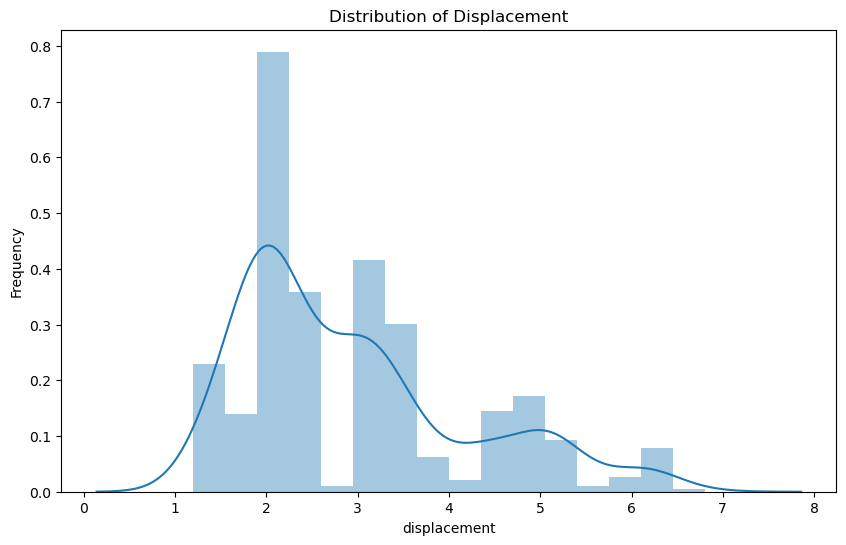

In [52]:
plt.figure(figsize=(10, 6))
sns.distplot(df['displacement'].dropna(), kde=True)  
plt.title('Distribution of Displacement')
plt.xlabel('displacement')
plt.ylabel('Frequency')
plt.show()

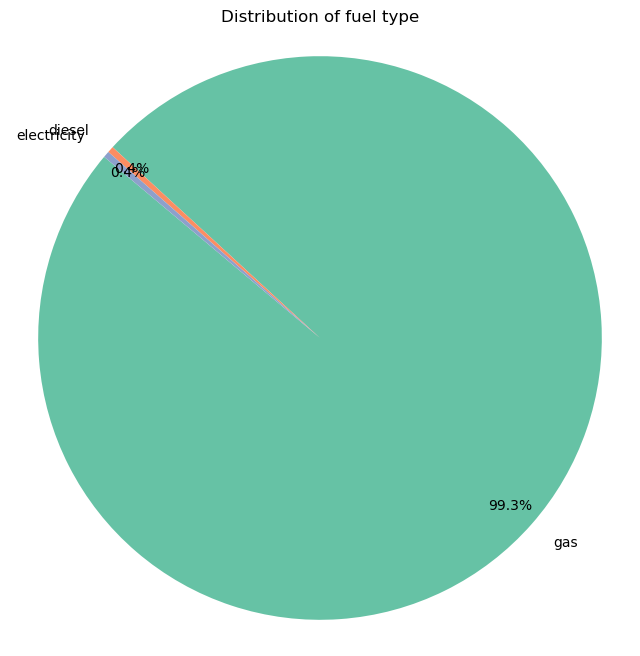

In [53]:
fuel_type_counts = df['fuel_type'].value_counts()

# creating a pie chart
plt.figure(figsize=(8, 8))
plt.pie(fuel_type_counts, 
        labels=fuel_type_counts.index, 
        autopct='%1.1f%%', 
        startangle=140, 
        colors=sns.color_palette("Set2", len(fuel_type_counts)),
        pctdistance=0.90)  #Increasing even more the distance of the percentages

plt.title('Distribution of fuel type')
plt.axis('equal')  # ensure the pie chart is circular
plt.show()

C:\Users\farsana majeed\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\farsana majeed\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\farsana majeed\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\farsana majeed\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Conver

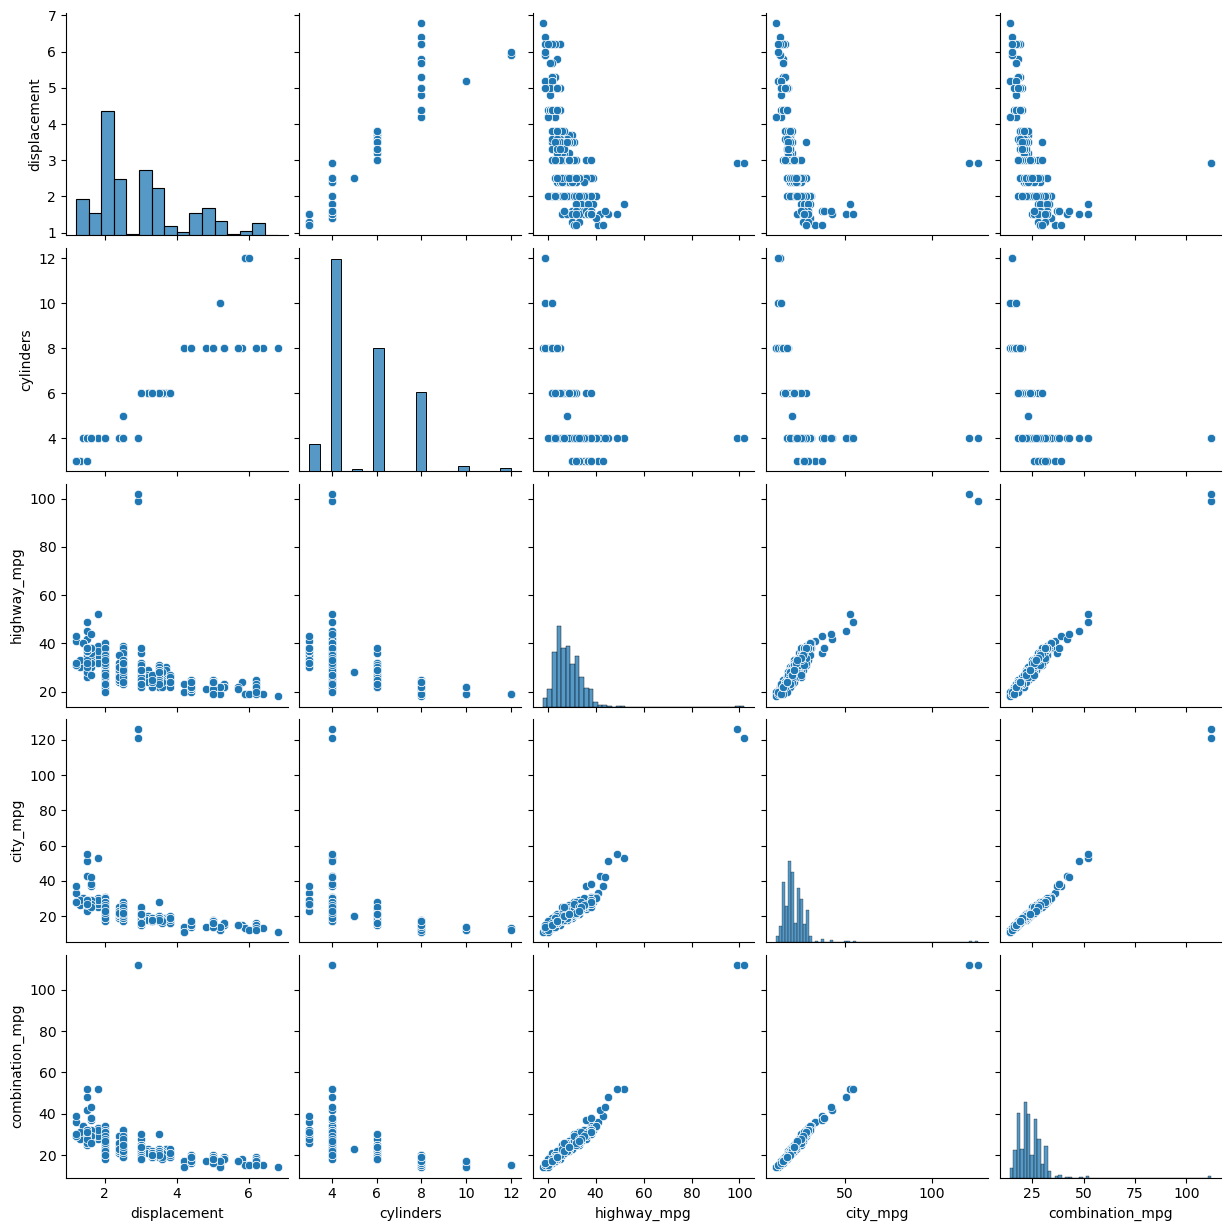

In [54]:
# pairplot for numerical variable
sns.pairplot(df[['displacement', 'cylinders', 'highway_mpg', 'city_mpg', 'combination_mpg']])
plt.show()

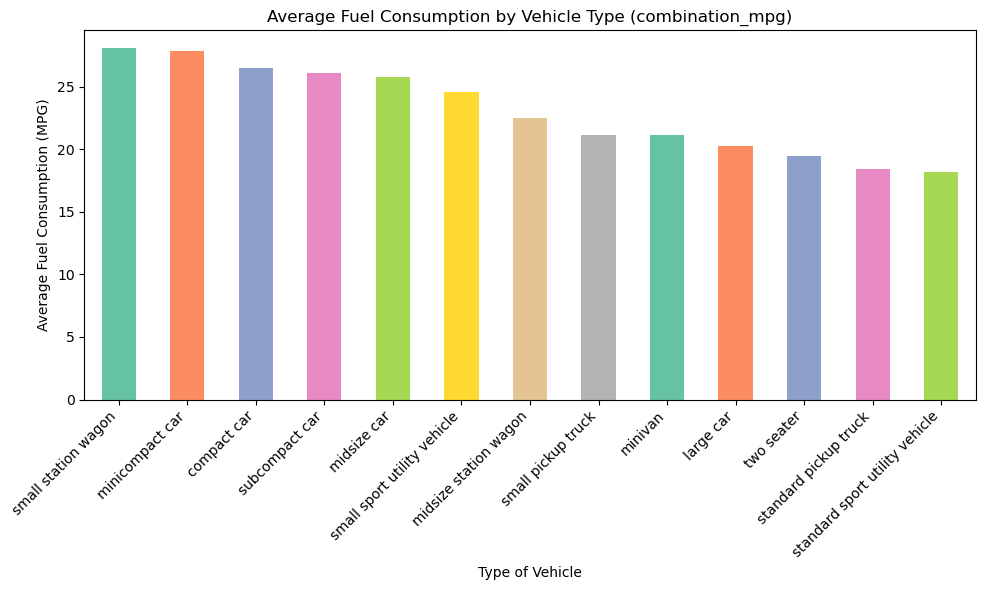

In [55]:
# grouping the data by vehicle type (class) and calculating the average fuel consumption
fuel_consumption_by_class = df.groupby('class')['combination_mpg'].mean().sort_values(ascending=False)

# creating bar chart
plt.figure(figsize=(10, 6))
fuel_consumption_by_class.plot(kind='bar', color=sns.color_palette("Set2", len(fuel_consumption_by_class)))
plt.title('Average Fuel Consumption by Vehicle Type (combination_mpg)')
plt.xlabel('Type of Vehicle')
plt.ylabel('Average Fuel Consumption (MPG)')
plt.xticks(rotation=45, ha='right')  # rotating the x labels 
plt.tight_layout()  # adjusting the layout
plt.show()

C:\Users\farsana majeed\AppData\Local\Temp\ipykernel_15076\994711829.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['combination_mpg'].dropna(), kde=True)  # For visualizing the distribution of 'combination_mpg'
C:\Users\farsana majeed\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


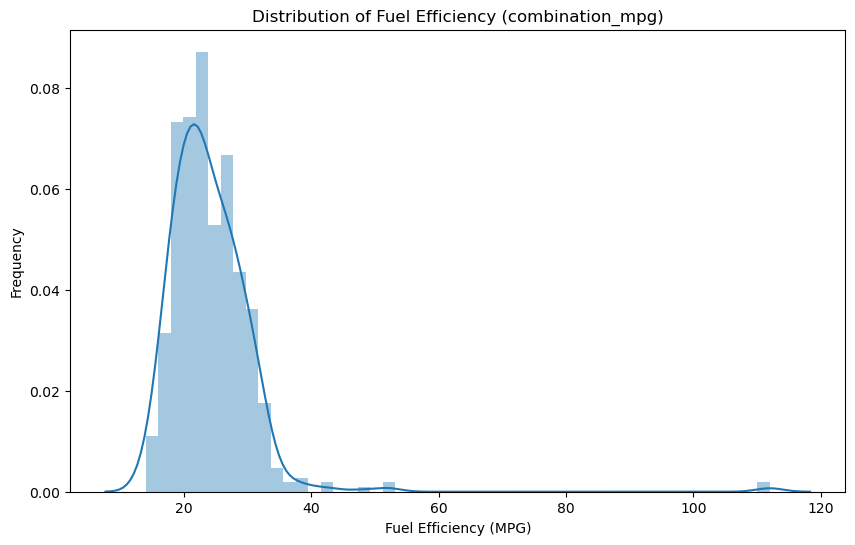

In [56]:
# visualization of combination_mpg
plt.figure(figsize=(10, 6))
sns.distplot(df['combination_mpg'].dropna(), kde=True)  # For visualizing the distribution of 'combination_mpg'
plt.title('Distribution of Fuel Efficiency (combination_mpg)')
plt.xlabel('Fuel Efficiency (MPG)')
plt.ylabel('Frequency')
plt.show()

In [57]:
df

,city_mpg,class,combination_mpg,cylinders,displacement,drive,fuel_type,highway_mpg,make,model,transmission,year
0,25,midsize car,29.0,4.0,2.5,fwd,gas,36,mazda,6,m,2014
1,26,midsize car,30.0,4.0,2.5,fwd,gas,37,mazda,6,a,2014
2,25,small sport utility vehicle,27.0,4.0,2.5,fwd,gas,31,mazda,cx-5 2wd,a,2014
3,26,small sport utility vehicle,29.0,4.0,2.0,fwd,gas,34,mazda,cx-5 2wd,m,2014
4,26,small sport utility vehicle,28.0,4.0,2.0,fwd,gas,32,mazda,cx-5 2wd,a,2014
...,...,...,...,...,...,...,...,...,...,...,...,...
545,23,compact car,27.0,4.0,2.0,awd,gas,33,bmw,430i xdrive gran coupe,a,2024
546,21,midsize car,24.0,6.0,3.0,rwd,gas,29,bmw,840i gran coupe,a,2024
547,21,midsize car,24.0,6.0,3.0,awd,gas,29,bmw,840i xdrive gran coupe,a,2024
548,17,midsize car,19.0,8.0,4.4,awd,gas,24,bmw,m850i xdrive gran coupe,a,2024


In [58]:
# encoding categorical variable
label_encoder = LabelEncoder()
for column in df.select_dtypes(include='object').columns:
    df[column] = label_encoder.fit_transform(df[column])

In [59]:
df

,city_mpg,class,combination_mpg,cylinders,displacement,drive,fuel_type,highway_mpg,make,model,transmission,year
0,25,2,29.0,4.0,2.5,2,2,36,19,15,1,2014
1,26,2,30.0,4.0,2.5,2,2,37,19,15,0,2014
2,25,7,27.0,4.0,2.5,2,2,31,19,74,0,2014
3,26,7,29.0,4.0,2.0,2,2,34,19,74,1,2014
4,26,7,28.0,4.0,2.0,2,2,32,19,74,0,2014
...,...,...,...,...,...,...,...,...,...,...,...,...
545,23,0,27.0,4.0,2.0,1,2,33,4,8,0,2024
546,21,2,24.0,6.0,3.0,3,2,29,4,28,0,2024
547,21,2,24.0,6.0,3.0,1,2,29,4,31,0,2024
548,17,2,19.0,8.0,4.4,1,2,24,4,158,0,2024


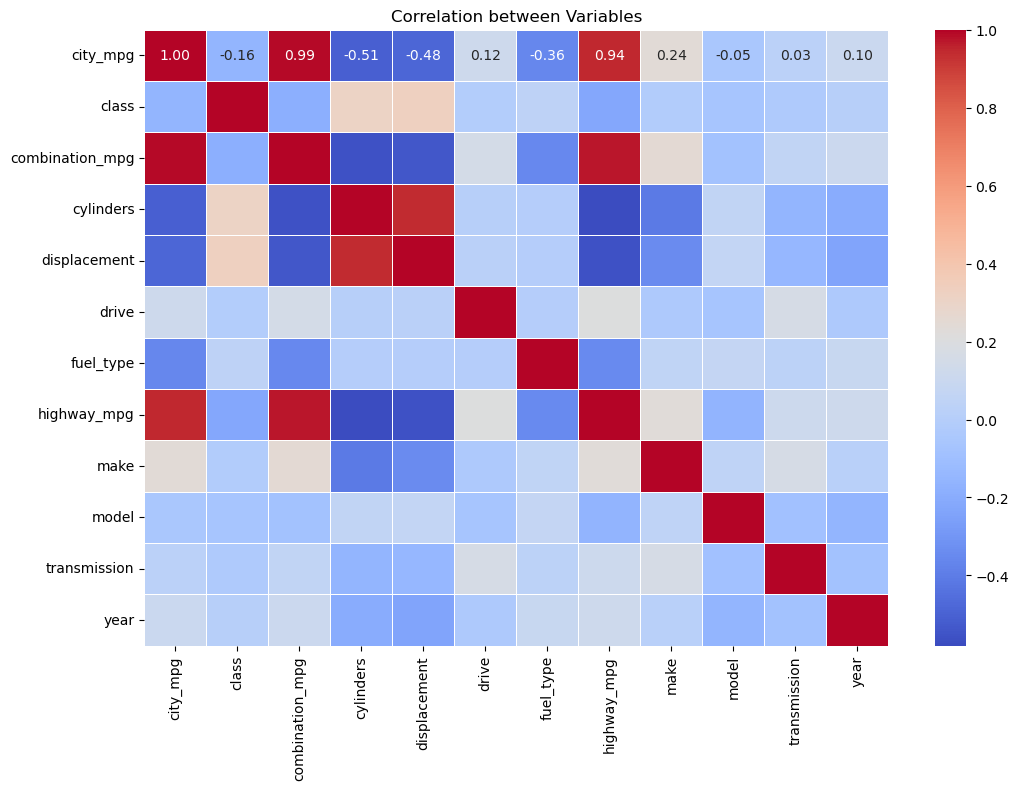

In [60]:
# Checking the correlation between variables
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation between Variables')
plt.show()

In [63]:
X= df.drop(columns=['combination_mpg'])
y = df['combination_mpg']

In [64]:
X

,city_mpg,class,cylinders,displacement,drive,fuel_type,highway_mpg,make,model,transmission,year
0,25,2,4.0,2.5,2,2,36,19,15,1,2014
1,26,2,4.0,2.5,2,2,37,19,15,0,2014
2,25,7,4.0,2.5,2,2,31,19,74,0,2014
3,26,7,4.0,2.0,2,2,34,19,74,1,2014
4,26,7,4.0,2.0,2,2,32,19,74,0,2014
...,...,...,...,...,...,...,...,...,...,...,...
545,23,0,4.0,2.0,1,2,33,4,8,0,2024
546,21,2,6.0,3.0,3,2,29,4,28,0,2024
547,21,2,6.0,3.0,1,2,29,4,31,0,2024
548,17,2,8.0,4.4,1,2,24,4,158,0,2024


In [65]:
y

0      29.0
1      30.0
2      27.0
3      29.0
4      28.0
       ... 
545    27.0
546    24.0
547    24.0
548    19.0
549    19.0
Name: combination_mpg, Length: 550, dtype: float64

In [66]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [70]:
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [71]:
print("Model Coefficients:", model.coef_)

Model Coefficients: [ 6.12458230e-01 -9.29101364e-03 -3.76721507e-02 -1.51641605e-01
  1.20787563e-02  2.15489950e-02  3.56107540e-01  3.76969200e-03
  5.24392204e-04 -8.80319826e-02 -2.14475108e-02]


In [72]:
print("Intercept of the model:", model.intercept_)

Intercept of the model: 44.563246794611985


In [73]:
print("Mean Squared Error (MSE):", mse)

Mean Squared Error (MSE): 0.1647498727446712


In [74]:
print("R-square (R²):", r2)

R-square (R²): 0.9936786569457676


In [75]:
Xnew = X_test.iloc[0].values.reshape(1, -1)
prediction = model.predict(Xnew)

C:\Users\farsana majeed\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [77]:
Xnew = X_test.iloc[0].values.reshape(1, -1)

prediction = model.predict(Xnew)
print("Prediction of Xnew:", prediction[0])

Prediction of Xnew: 18.96103787120382


C:\Users\farsana majeed\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
